In [12]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap8
/Users/jinceyang/Desktop/codebase/ml/learn_d2l already in Python path


In [13]:
import importlib
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import numpy as np

import importlib
from d2l.classification.model import NiNClassifier
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.plot import plot_loss, plot_losses, show_images
from typing import List
from matplotlib import pyplot as plt
import torch
import numpy as np

from d2l.base.function import corr2d, corr2d_multi_in, corr2d_multi_in_out, corr2d_multi_in_out_1x1, comp_conv2d, max_pool2d, avg_pool2d

In [14]:
data = FashionMNISTDataset()

In [15]:
rng = torch.Generator().manual_seed(42)

In [16]:
nin = NiNClassifier(
    num_outputs=10, 
    rng=rng
)

In [17]:
nin.init((10, 1, 28, 28))
nin.layer_summary((10, 1, 28, 28))

            NiNBlock  input shape: torch.Size([10, 1, 28, 28])
            NiNBlock  output shape: torch.Size([10, 64, 28, 28])
           MaxPool2d  input shape: torch.Size([10, 64, 28, 28])
           MaxPool2d  output shape: torch.Size([10, 64, 13, 13])
            NiNBlock  input shape: torch.Size([10, 64, 13, 13])
            NiNBlock  output shape: torch.Size([10, 128, 13, 13])
           MaxPool2d  input shape: torch.Size([10, 128, 13, 13])
           MaxPool2d  output shape: torch.Size([10, 128, 6, 6])
             Dropout  input shape: torch.Size([10, 128, 6, 6])
             Dropout  output shape: torch.Size([10, 128, 6, 6])
            NiNBlock  input shape: torch.Size([10, 128, 6, 6])
            NiNBlock  output shape: torch.Size([10, 10, 6, 6])
   AdaptiveAvgPool2d  input shape: torch.Size([10, 10, 6, 6])
   AdaptiveAvgPool2d  output shape: torch.Size([10, 10, 1, 1])
             Flatten  input shape: torch.Size([10, 10, 1, 1])
             Flatten  output shape: torch.Si

In [18]:
def eval_on_epoch(model, epoch_id, batch_losses):
    evaluator = ClassificationEvaluator(model)
    loss = evaluator.loss(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation loss {loss:.4f}')
    accuracy = evaluator.accuracy(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation accuracy {accuracy:.4f}')

In [19]:
trainer = Trainer(
    model=nin,
    optimizer=torch.optim.Adam(nin.net.parameters(), lr=0.005),
    on_train_epoch_end=eval_on_epoch
)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 0, validation loss 0.7588
Epoch 0, validation accuracy 0.7324


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 1, validation loss 0.6443
Epoch 1, validation accuracy 0.7751


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 2, validation loss 0.5456
Epoch 2, validation accuracy 0.8052


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 3, validation loss 0.5416
Epoch 3, validation accuracy 0.7972


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 4, validation loss 0.5104
Epoch 4, validation accuracy 0.8118


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 5, validation loss 0.5018
Epoch 5, validation accuracy 0.8187


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 6, validation loss 0.4474
Epoch 6, validation accuracy 0.8368


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 7, validation loss 0.4333
Epoch 7, validation accuracy 0.8361


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 8, validation loss 0.4176
Epoch 8, validation accuracy 0.8514


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 9, validation loss 0.3685
Epoch 9, validation accuracy 0.8663


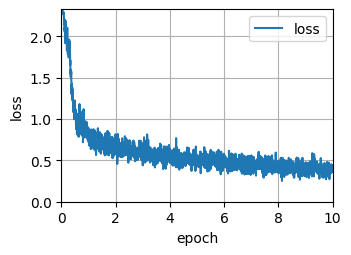

In [20]:
epoch_losses = trainer.train(
    data.get_train_dataloader_epochs(batch_size=256, num_epochs=10)
)
fig, ax = plt.subplots()
plot_loss(ax, epoch_losses)

In [21]:
evaluator = ClassificationEvaluator(nin)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy: {accuracy:.2%}')

Test loss: 0.3685
Test accuracy: 86.63%


In [22]:
# save the model
nin.save('nin_fashion_mnist.pth')